In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix

plt.style.use("seaborn")
dir = "ml-100k"

In [2]:
data = pd.read_csv(os.path.join(dir, "u.data"), delimiter="\t", header=None)
data.columns = ["user", "item", "score", "timestamp"]

item = pd.read_csv(
    os.path.join(dir, "u.item"), delimiter="|", encoding="ISO-8859-1", header=None
)
item.columns = [
    "movie id",
    "movie title",
    "release date",
    "video release date",
    "IMDb URL",
    "unknown",
    "Action",
    "Adventure",
    "Animation",
    "Children's",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film-Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci-Fi",
    "Thriller",
    "War",
    "Western",
]

user = pd.read_csv(os.path.join(dir, "u.user"), delimiter="|", header=None)
user.columns = ["user id", "age", "gender", "occupation", "zip code"]

data = data.join(user.set_index("user id"), on="user").join(
    item.set_index("movie id"), on="item"
)
display(data)

,user,item,score,timestamp,age,gender,occupation,zip code,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,13,M,student,83702,"First Wives Club, The (1996)",14-Sep-1996,...,0,0,0,0,0,0,0,0,0,0
99996,716,204,5,879795543,36,F,administrator,44265,Back to the Future (1985),01-Jan-1985,...,0,0,0,0,0,0,1,0,0,0
99997,276,1090,1,874795795,21,M,student,95064,Sliver (1993),01-Jan-1993,...,0,0,0,0,0,0,0,1,0,0
99998,13,225,2,882399156,47,M,educator,29206,101 Dalmatians (1996),27-Nov-1996,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# one hot encode categorical variables

data["male"] = data.gender == "M"
data["male"] = data.male.map({True: 1, False: 0})

data["female"] = data.gender == "F"
data["female"] = data.female.map({True: 1, False: 0})

enc = OneHotEncoder()
oh = pd.DataFrame(
    csr_matrix(enc.fit_transform(data.occupation.to_numpy().reshape(-1, 1))).todense(),
    columns=[n[3:] for n in enc.get_feature_names_out()],
)
data = pd.concat([data, oh], axis=1)
data

,user,item,score,timestamp,age,gender,occupation,zip code,movie title,release date,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,186,302,3,891717742,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,244,51,2,880606923,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,166,346,1,886397596,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,13,M,student,83702,"First Wives Club, The (1996)",14-Sep-1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99996,716,204,5,879795543,36,F,administrator,44265,Back to the Future (1985),01-Jan-1985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,276,1090,1,874795795,21,M,student,95064,Sliver (1993),01-Jan-1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,13,225,2,882399156,47,M,educator,29206,101 Dalmatians (1996),27-Nov-1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = data.drop(["gender", "occupation", "video release date"], axis=1)

In [5]:
u2i = {}
for u in data.user.unique():
    u2i[u] = data[data.user == u].item.unique()

i2u = {}
for i in data.item.unique():
    i2u[i] = data[data.item == i].user.unique()

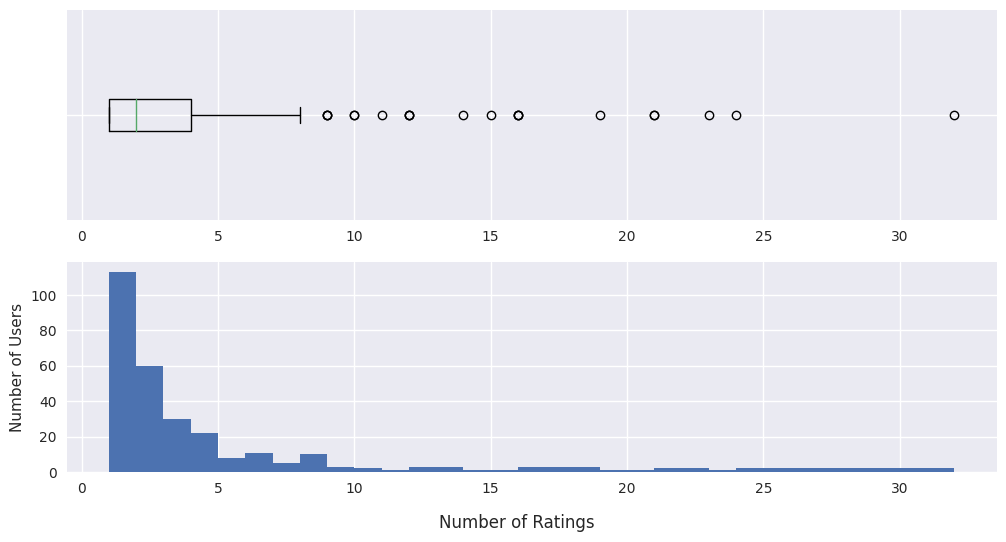

1 32 3.379928315412186


In [23]:
counts = {}
for u in u2i:
    l = len(u2i[u])
    counts[l] = counts.get(l, 0) + 1

counts = list(counts.values())

# plot figure
fig, (ax1, ax2) = plt.subplots(2)

# boxplot
ax1.boxplot(counts, vert=False)
ax1.set_yticks([1], [""])
# ax1.set_ylabel("Number of Users")
# ax1.set_ylim(0, 20)

# histogram
ax2.hist(counts, bins=np.unique(counts))
ax2.set_ylabel("Number of Users")

fig.supxlabel("Number of Ratings")
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

print(np.min(counts), np.max(counts), np.mean(counts))

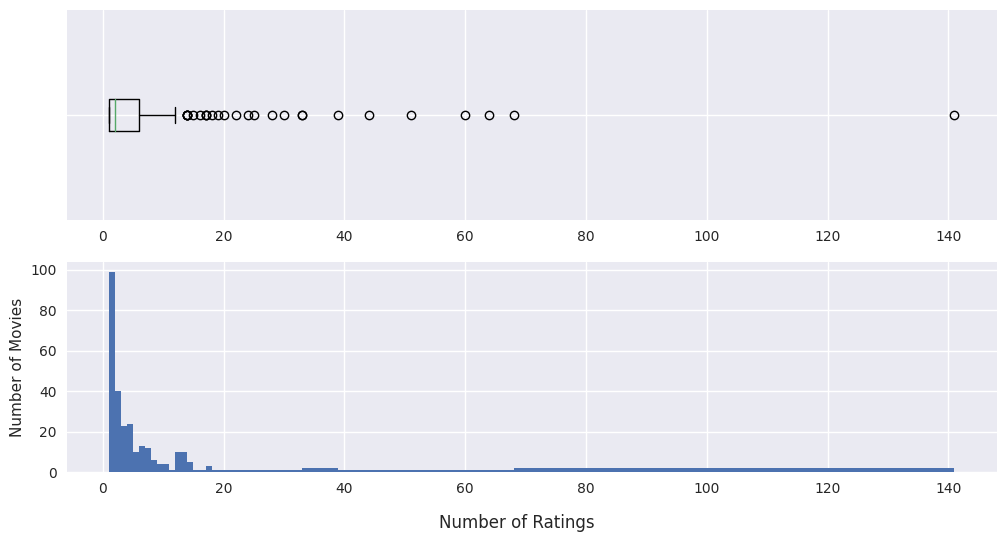

1 141 6.1611721611721615


In [25]:
counts = {}
for i in i2u:
    l = len(i2u[i])
    counts[l] = counts.get(l, 0) + 1

counts = list(counts.values())

# plot figure
fig, (ax1, ax2) = plt.subplots(2)

# boxplot
ax1.boxplot(counts, vert=False)
ax1.set_yticks([1], [""])
# ax1.set_ylabel("#watchers")
# ax1.set_ylim(0, 20)

# histogram
ax2.hist(counts, bins=np.unique(counts))
ax2.set_ylabel("Number of Movies")

fig.supxlabel("Number of Ratings")
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

print(np.min(counts), np.max(counts), np.mean(counts))

In [8]:
cols = list(data.columns[4:10]) + list(data.columns[12:])
print(cols)
print(data.columns)
corr = data[cols].corr(numeric_only=True)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(
    corr.style.background_gradient(cmap="coolwarm", axis=None, vmin=-1, vmax=1)
    .highlight_null(color="#f1f1f1")  # Color NaNs grey
    .format(precision=2)
)

['age', 'zip code', 'movie title', 'release date', 'IMDb URL', 'unknown', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'male', 'female', 'administrator', 'artist', 'doctor', 'educator', 'engineer', 'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer', 'librarian', 'marketing', 'none', 'other', 'programmer', 'retired', 'salesman', 'scientist', 'student', 'technician', 'writer']
Index(['user', 'item', 'score', 'timestamp', 'age', 'zip code', 'movie title',
       'release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'male', 'female',
       'administrator', 'artist', 'doctor', 'educator', 'engineer',
       'entertainment', 'executive', 'healt

,age,unknown,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,male,female,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,librarian,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
age,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
unknown,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Animation,-0.03,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Children's,-0.03,-0.00,0.56,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Comedy,-0.03,-0.01,0.03,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Crime,-0.01,-0.00,-0.06,-0.08,-0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Documentary,0.02,-0.00,-0.02,-0.02,-0.06,-0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Drama,0.08,-0.01,-0.16,-0.13,-0.35,0.06,-0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Fantasy,-0.01,-0.00,0.03,0.24,0.02,0.01,-0.01,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Film-Noir,0.03,-0.00,-0.03,-0.04,-0.09,0.16,-0.01,-0.08,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
